# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# **Loading Data**

In [2]:
df = pd.read_csv("data/full_gen_data.csv")

In [3]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [4]:
df.shape

(100000, 24)

- country:	Country name
- article: 	6 digit article number, as unique identifier of an article
- sales: 		total number of units sold in respective retail week
- regular_price:	recommended retail price of the article
- current_price: current selling price (weighted average over the week)
- ratio:		price ratio as current_price/regular_price, such that price discount is 1-ratio
- retailweek:	start date of the retailweek
- promo1:	indicator for media advertisement, taking 1 in - weeks of activation and 0 otherwise
- promo2:	indicator for store events, taking 1 in weeks - with events and 0 otherwise
- customer_id:	customer unique identifier, one id per customer
- article: 	6 digit article number, as unique identifier of an article
- productgroup:	product group the article belongs to
- category:	product category the article belongs to
- cost:		total costs of the article (assumed to be fixed over time)
- style:		description of article design
- sizes:		size range in which article is available
- gender:	gender of target consumer of the article
- rgb_*_main_color:	intensity of the red (r), green (g), and blue (b) primaries of the article‘s  main color, 		- taking values [0,250]
- rgb_*_sec_color:	intensity of the red (r), green (g), and blue (b) primaries of the article‘s secondary 		color, taking values [0,250]
- label:		advertisement result after offering/sending/presenting the offer to the customer. 0 means the customer did not buy and 1 means the costumer did buy.



# **EDA & Data Visualization**

In [5]:
df.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [7]:
class0 = df[df['label']==0]
class1 = df[df['label']==1]

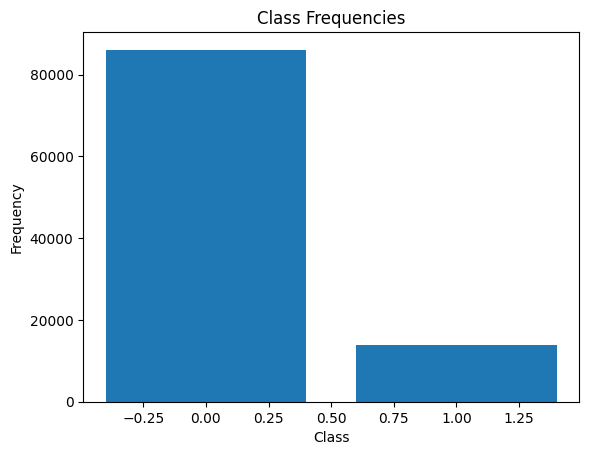

In [8]:
plt.bar([0, 1], [len(class0), len(class1)])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Frequencies')
plt.show()

We can clearly see that the data is imbalanced, class 0 is nearly 6 times class 1.

In [9]:
num_feat = []
cat_feat = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_feat.append(col)
    else:
        num_feat.append(col)

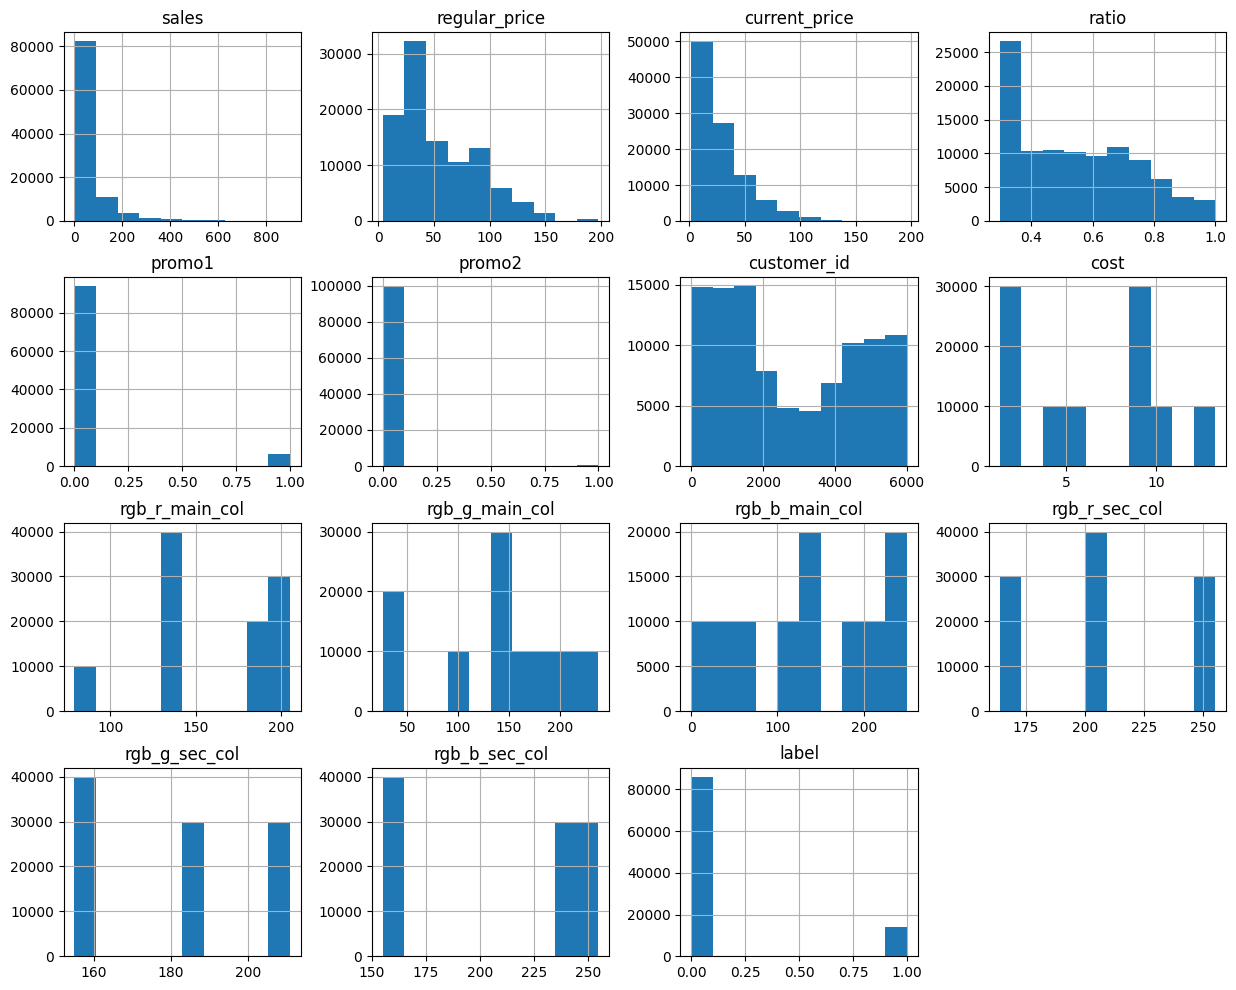

In [10]:
# Check the distribution of all the features
df.hist(figsize=(15,12))
plt.title("Features Distribution")
plt.show()

for sales (array([  350,   351,   352, ..., 99997, 99998, 99999]),)
for regular_price (array([ 1260,  1261,  1262,  1263,  1264,  1265,  1266,  1267,  1268,
        1269,  6880,  6881,  6882,  6883,  6884,  6885,  6886,  6887,
        6888,  6889, 13380, 13381, 13382, 13383, 13384, 13385, 13386,
       13387, 13388, 13389, 15650, 15651, 15652, 15653, 15654, 15655,
       15656, 15657, 15658, 15659, 16680, 16681, 16682, 16683, 16684,
       16685, 16686, 16687, 16688, 16689, 20280, 20281, 20282, 20283,
       20284, 20285, 20286, 20287, 20288, 20289, 22880, 22881, 22882,
       22883, 22884, 22885, 22886, 22887, 22888, 22889, 27380, 27381,
       27382, 27383, 27384, 27385, 27386, 27387, 27388, 27389, 34960,
       34961, 34962, 34963, 34964, 34965, 34966, 34967, 34968, 34969,
       36440, 36441, 36442, 36443, 36444, 36445, 36446, 36447, 36448,
       36449, 38590, 38591, 38592, 38593, 38594, 38595, 38596, 38597,
       38598, 38599, 40610, 40611, 40612, 40613, 40614, 40615, 40616,
   

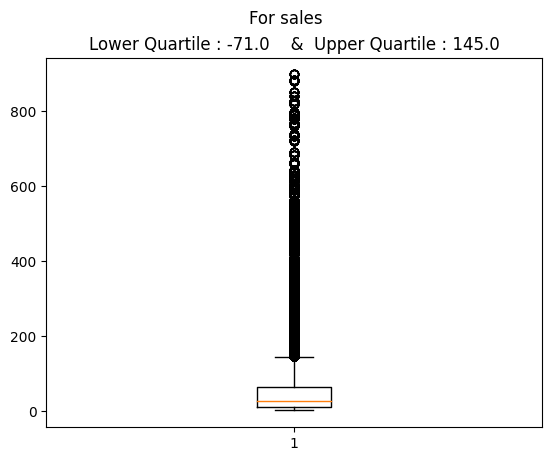

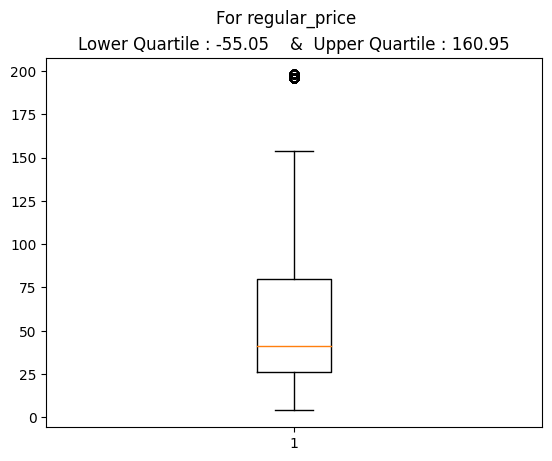

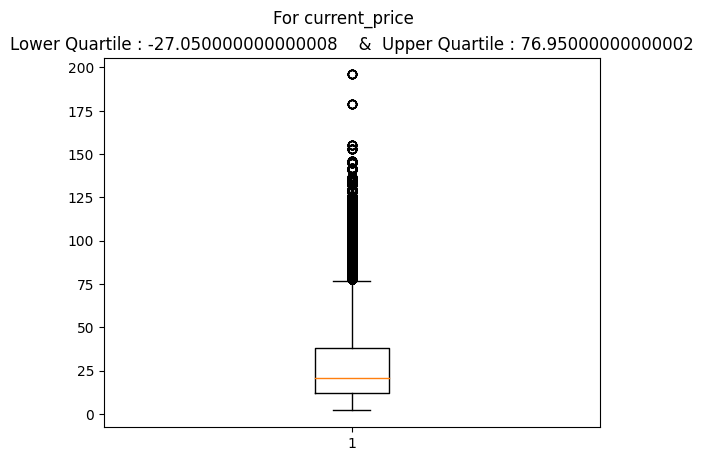

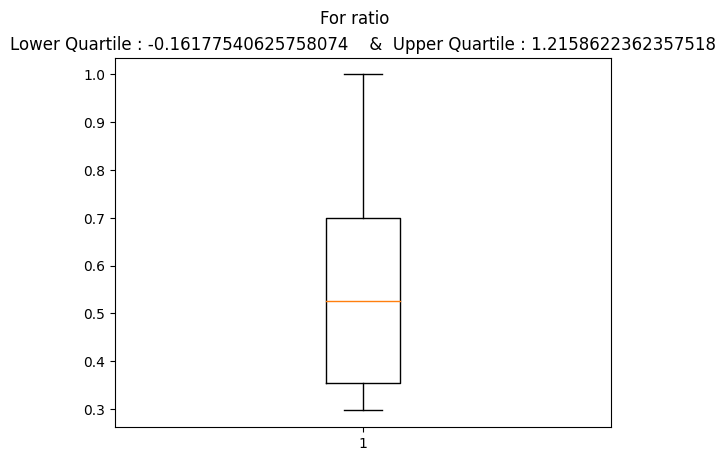

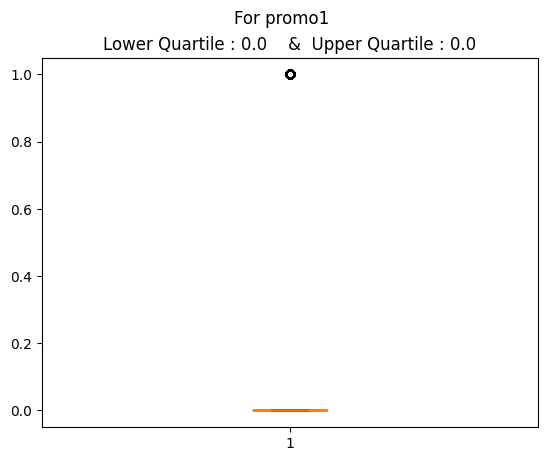

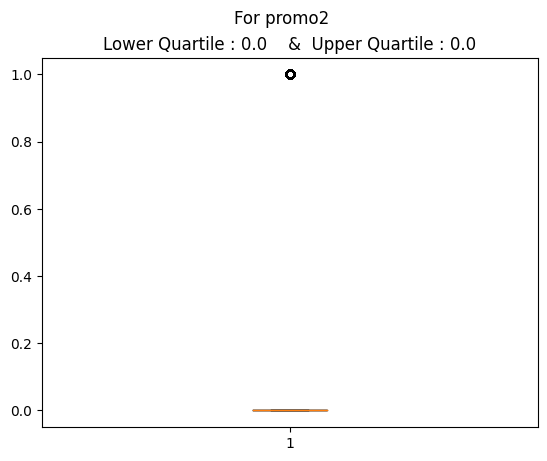

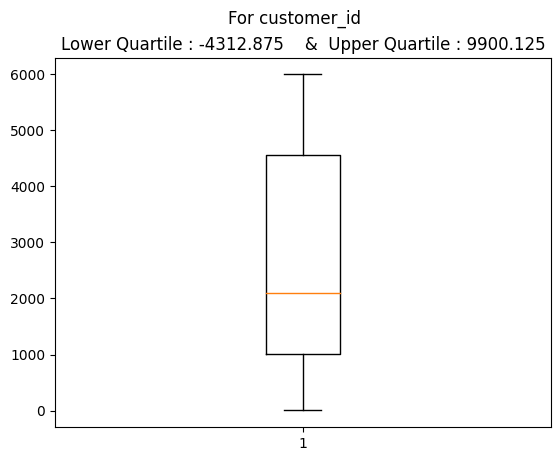

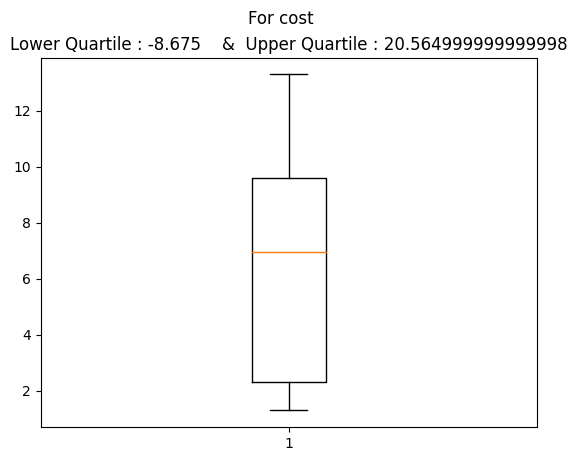

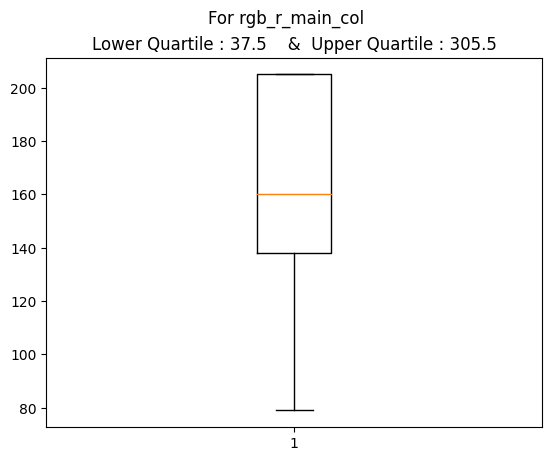

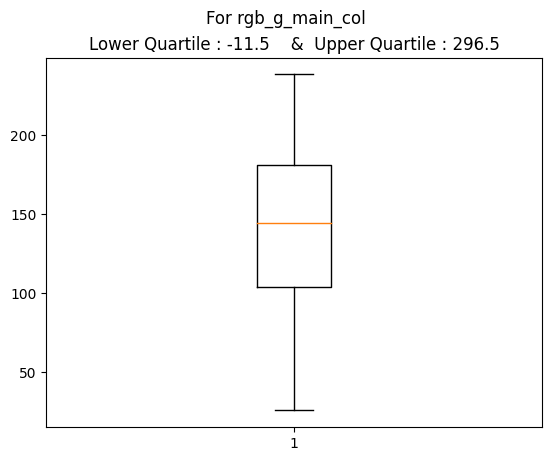

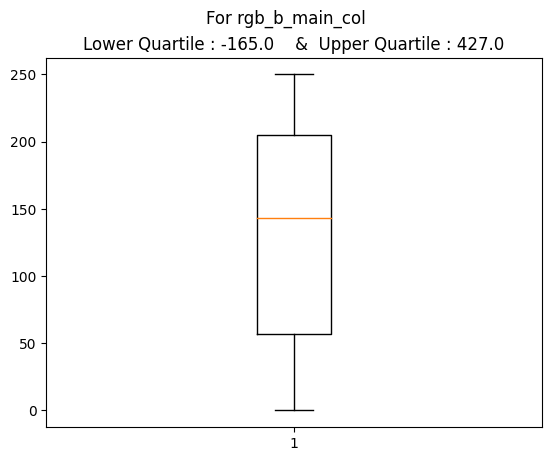

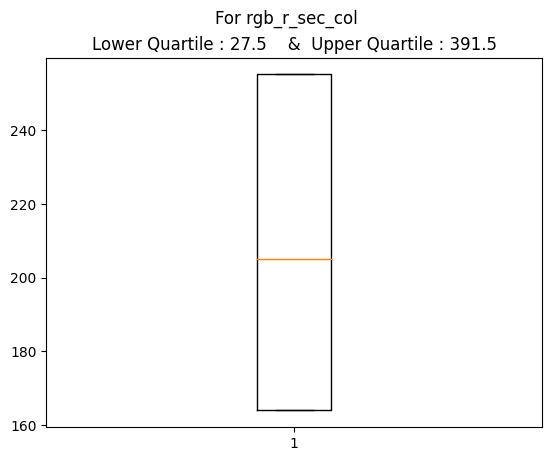

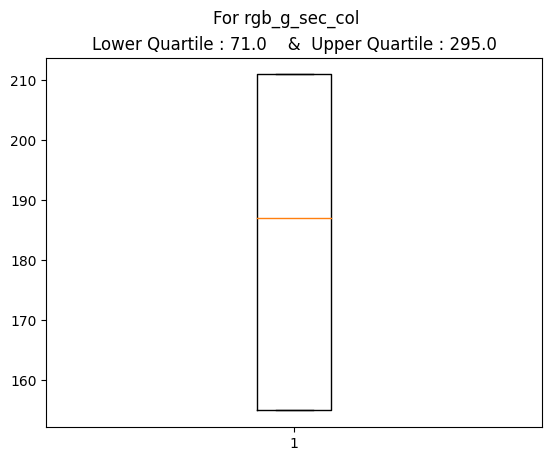

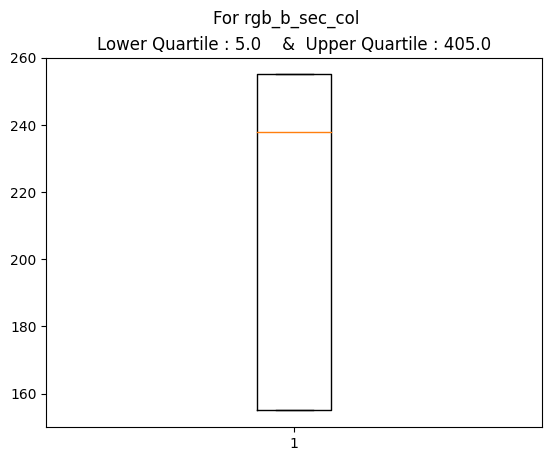

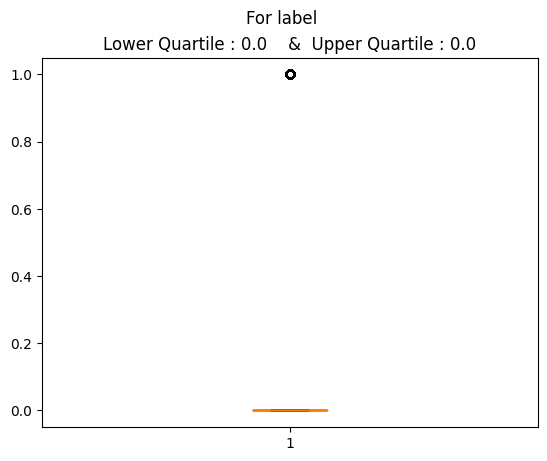

In [11]:
def Find_Outliers(df):
    for i in num_feat:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR=q3-q1
        l1=q1 - (IQR * 1.5)
        l2=q3 + (IQR * 1.5)
        l3=df[i]<=l1
        l4=df[i]>=l2
        outliers = df[((df[i]<(l1)) | (df[i]>(l2)))]
        plt.figure()
        plt.boxplot(df[i])
        plt.title(f"Lower Quartile : {l1}    &  Upper Quartile : {l2}")
        plt.suptitle(f"For {i}")
        print(f"for {i}",np.where(l3) and np.where(l4))


Find_Outliers(df)

         country  Ratio
Germany    49400  49.40
Austria    35140  35.14
France     15460  15.46


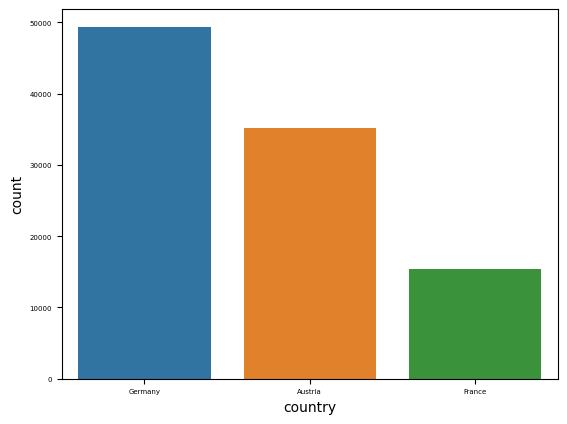

        article  Ratio
BR3179      610   0.61
MR4948      560   0.56
XG6449      550   0.55
AA7884      540   0.54
OP1184      520   0.52
...         ...    ...
AL9977       70   0.07
SJ4545       70   0.07
UX6816       60   0.06
TA7629       60   0.06
PB1483       60   0.06

[477 rows x 2 columns]


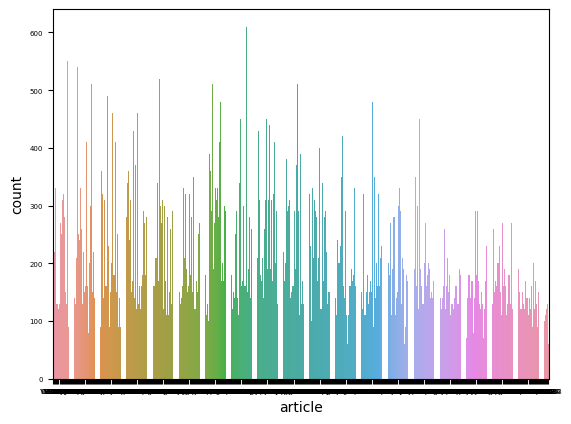

            retailweek  Ratio
2015-11-22        1100   1.10
2016-12-25        1050   1.05
2015-09-27        1010   1.01
2016-05-15         980   0.98
2015-05-10         960   0.96
...                ...    ...
2016-04-03         660   0.66
2016-10-30         650   0.65
2016-08-07         650   0.65
2017-03-19         640   0.64
2017-03-26         600   0.60

[123 rows x 2 columns]


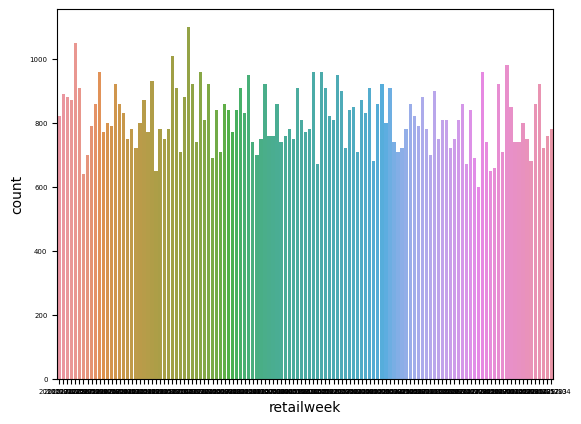

        article.1  Ratio
OC6355      10000   10.0
AP5568      10000   10.0
CB8861      10000   10.0
LI3529      10000   10.0
GG8661      10000   10.0
TX1463      10000   10.0
PC6383      10000   10.0
VT7698      10000   10.0
FG2965      10000   10.0
AC7347      10000   10.0


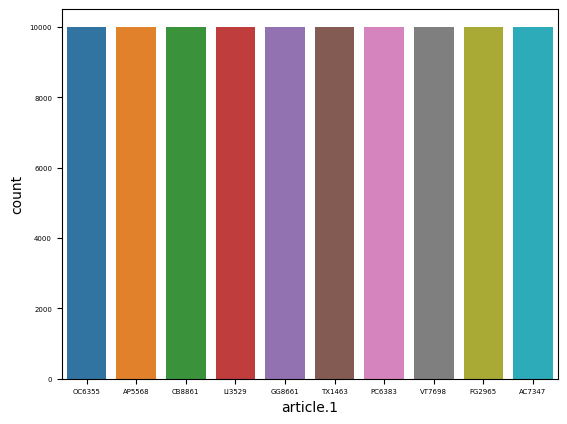

                      productgroup  Ratio
SHOES                        60000   60.0
HARDWARE ACCESSORIES         20000   20.0
SHORTS                       10000   10.0
SWEATSHIRTS                  10000   10.0


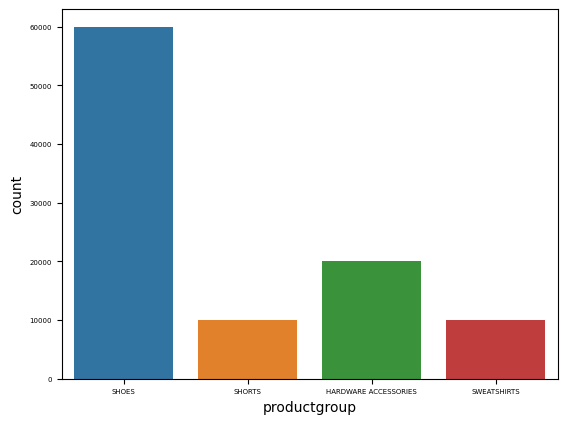

                  category  Ratio
TRAINING             30000   30.0
RUNNING              20000   20.0
FOOTBALL GENERIC     20000   20.0
GOLF                 10000   10.0
RELAX CASUAL         10000   10.0
INDOOR               10000   10.0


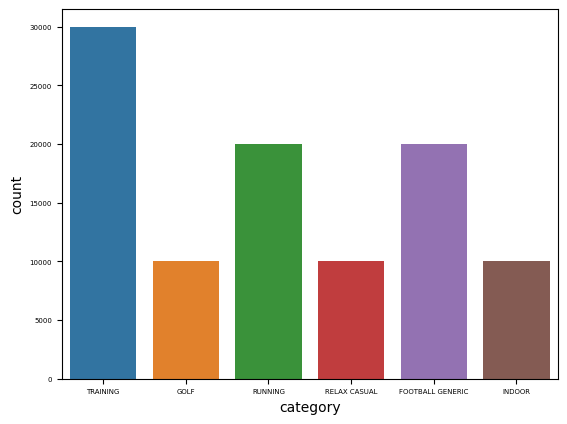

         style  Ratio
regular  50000   50.0
wide     30000   30.0
slim     20000   20.0


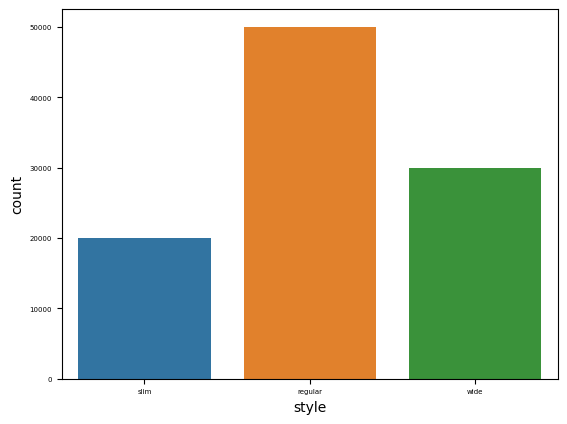

                     sizes  Ratio
xxs,xs,s,m,l,xl,xxl  90000   90.0
xs,s,m,l,xl          10000   10.0


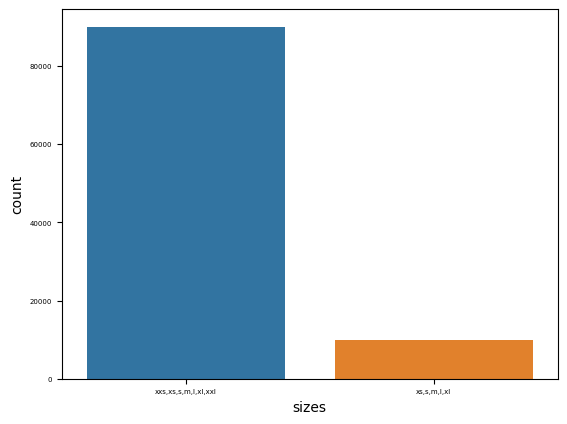

        gender  Ratio
women    70000   70.0
kids     10000   10.0
unisex   10000   10.0
men      10000   10.0


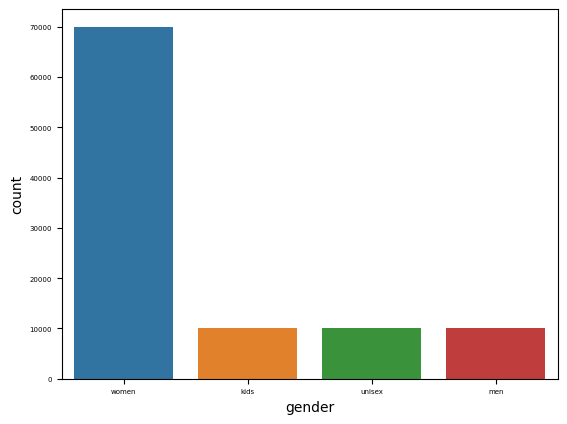

In [12]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(fontsize=5)
        plt.yticks(fontsize=5)
        plt.show(block=True)

for col in cat_feat:
    cat_summary(df, col, plot=True)

# New Features

Hypothesis 1: To consider the impact of the discounted amount on purchasing behavior, a new feature called price_difference was created, which represents the difference between the regular_price and the current_price.

In [13]:
df['price_difference'] = df['regular_price'] - df['current_price']

Hypothesis 2: To analyze the influence of the offering time, new features were generated for each week of the month and a feature indicating the month number.

In [14]:
df['retailweek'] = pd.to_datetime(df['retailweek'])

In [15]:
df

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,price_difference
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2.0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2.0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2.0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2.0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0,31.0
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0,31.0
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,0,31.0
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0,31.0


In [16]:
df['week_number'] = (df['retailweek'].dt.day - 1) // 7 + 1

In [17]:
df['month_number'] = df['retailweek'].dt.month

In [18]:
df

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,price_difference,week_number,month_number
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,205,104,57,255,187,255,0,2.0,4,3
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,188,238,104,255,187,255,0,2.0,4,3
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,205,173,0,255,187,255,0,2.0,4,3
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,205,140,149,164,211,238,0,2.0,4,3
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,138,43,226,164,211,238,0,2.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,79,148,205,164,211,238,0,31.0,4,6
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,139,26,26,205,155,155,0,31.0,4,6
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,135,206,250,205,155,155,0,31.0,4,6
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,181,181,181,205,155,155,0,31.0,4,6


In [19]:
class0 = df[df['label']==0]
class1 = df[df['label']==1]

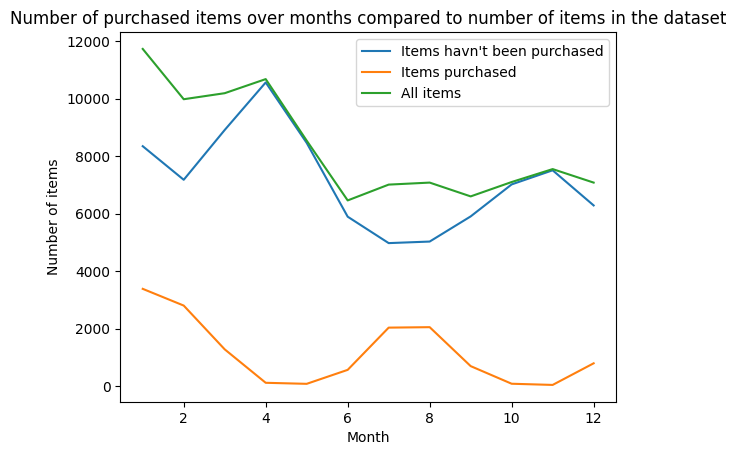

In [20]:
plt.plot(class0['month_number'].value_counts().sort_index(), label='Items havn\'t been purchased')
plt.plot(class1['month_number'].value_counts().sort_index(), label='Items purchased')
plt.plot(df['month_number'].value_counts().sort_index(), label='All items')
plt.xlabel('Month')
plt.ylabel('Number of items')
plt.title("Number of purchased items over months compared to number of items in the dataset")
plt.legend()
plt.show()

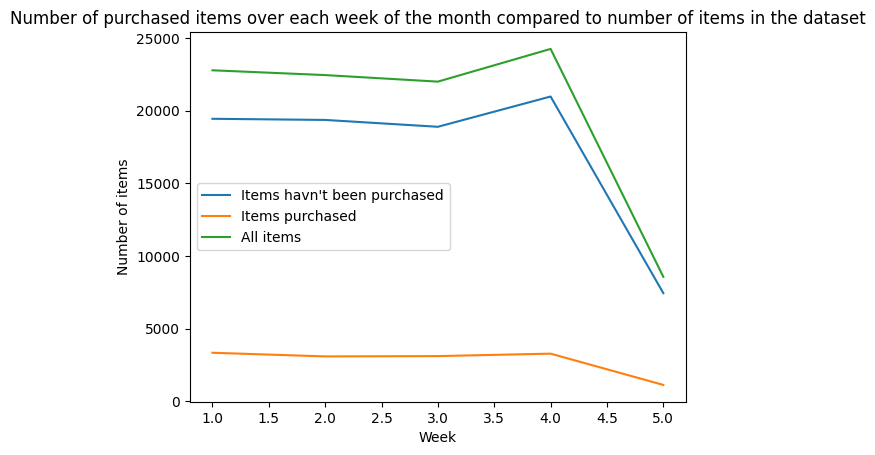

In [21]:
plt.plot(class0['week_number'].value_counts().sort_index(), label='Items havn\'t been purchased')
plt.plot(class1['week_number'].value_counts().sort_index(), label='Items purchased')
plt.plot(df['week_number'].value_counts().sort_index(), label='All items')
plt.xlabel('Week')
plt.ylabel('Number of items')
plt.title("Number of purchased items over each week of the month compared to number of items in the dataset")
plt.legend()
plt.show()

Now we discovered that people's purchasing power decreases by the end of every month.

Also, we discovered that the 6 -> 8 and 10 -> months have the fewer number of items purchased.

Now time to check the colors affection on purchasing

In [22]:
rgb_b = class1['rgb_b_main_col'].value_counts().sort_index()

In [23]:
rgb_b.index

Int64Index([0, 26, 57, 104, 137, 149, 181, 205, 226, 250], dtype='int64')

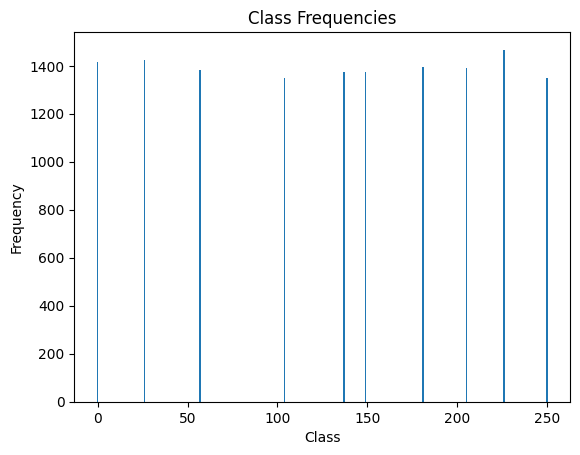

In [24]:
plt.bar(rgb_b.index, rgb_b.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Frequencies')
plt.show()

In [25]:
rgb_g = class1['rgb_g_main_col'].value_counts().sort_index()

In [26]:
rgb_g.index

Int64Index([26, 43, 104, 137, 140, 148, 173, 181, 206, 238], dtype='int64')

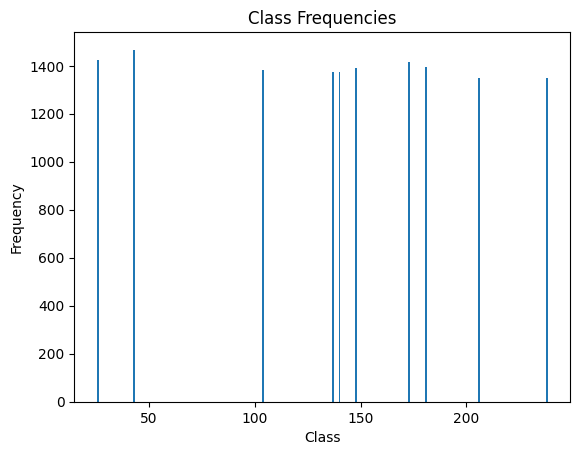

In [27]:
plt.bar(rgb_g.index, rgb_g.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Frequencies')
plt.show()

In [28]:
rgb_r = class1['rgb_r_main_col'].value_counts().sort_index()

In [29]:
rgb_r.index

Int64Index([79, 135, 138, 139, 181, 188, 205], dtype='int64')

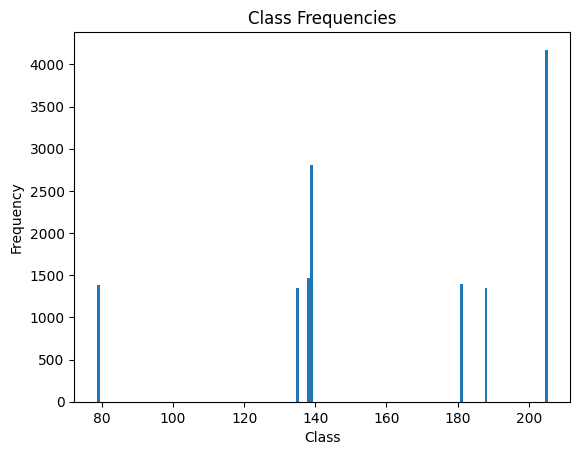

In [30]:
plt.bar(rgb_r.index, rgb_r.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Frequencies')
plt.show()

The red color has the most impact on purchasing

# **Data Preprocessing**

In [31]:
# First, making sure that we don't have null values.
df.isna().sum()

country             0
article             0
sales               0
regular_price       0
current_price       0
ratio               0
retailweek          0
promo1              0
promo2              0
customer_id         0
article.1           0
productgroup        0
category            0
cost                0
style               0
sizes               0
gender              0
rgb_r_main_col      0
rgb_g_main_col      0
rgb_b_main_col      0
rgb_r_sec_col       0
rgb_g_sec_col       0
rgb_b_sec_col       0
label               0
price_difference    0
week_number         0
month_number        0
dtype: int64

In [32]:
df

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,price_difference,week_number,month_number
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,205,104,57,255,187,255,0,2.0,4,3
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,188,238,104,255,187,255,0,2.0,4,3
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,205,173,0,255,187,255,0,2.0,4,3
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,205,140,149,164,211,238,0,2.0,4,3
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,138,43,226,164,211,238,0,2.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,79,148,205,164,211,238,0,31.0,4,6
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,139,26,26,205,155,155,0,31.0,4,6
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,135,206,250,205,155,155,0,31.0,4,6
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,181,181,181,205,155,155,0,31.0,4,6


In [33]:
# cat_cols is all categorical in the dataset a now we are converting them using one hot encoding.
cat_cols = ['country', 'productgroup', 'category', 'style', 'gender', 'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col', 'week_number', 'month_number']

enc = OneHotEncoder()

enc_data = pd.DataFrame(enc.fit_transform(df[cat_cols]).toarray())

new_df = df.join(enc_data)

In [34]:
# dropping unused columns
new_df = new_df.drop(['country', 'productgroup', 'style', 'regular_price', 'current_price', 'retailweek', 'sizes', 'article.1', 'customer_id', 'article', 'category', 'gender', 'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col',  'week_number', 'month_number'], axis=1)

In [35]:
new_df

,sales,ratio,promo1,promo2,cost,label,price_difference,0,1,2,...,63,64,65,66,67,68,69,70,71,72
0,28,0.663866,0,0,13.29,0,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28,0.663866,0,0,2.29,0,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,0.663866,0,0,1.70,0,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,0.663866,0,0,9.00,0,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,0.663866,0,0,9.60,0,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,227,0.465056,0,0,4.20,0,31.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,227,0.465056,0,0,9.90,0,31.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,227,0.465056,0,0,5.20,0,31.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,227,0.465056,0,0,1.29,0,31.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# After finding that we imbalanced data, using upsampling would the best thing to make them balanced

df_1 = new_df[new_df['label']==1]
df_0 = (new_df[new_df['label']==0]).sample(n=86072,random_state=42,replace=True)

df_1_upsample=resample(df_1,replace=True,n_samples=86000,random_state=123)

new_df=pd.concat([df_0,df_1_upsample])

In [37]:
new_df

,sales,ratio,promo1,promo2,cost,label,price_difference,0,1,2,...,63,64,65,66,67,68,69,70,71,72
18441,2,0.756969,0,0,2.29,0,17.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
987,261,0.301033,0,0,5.20,0,44.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89241,164,0.753445,0,0,2.29,0,17.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63924,61,0.415449,0,0,9.60,0,14.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7195,19,0.730318,0,0,4.20,0,31.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76670,36,0.714116,0,0,13.29,1,24.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51852,50,0.658120,0,0,1.70,1,14.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62474,8,0.746835,0,0,9.60,1,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84374,11,0.642602,0,0,9.60,1,25.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
# Reset index after adding new samples
new_df.reset_index(inplace = True, drop = True)

In [39]:
new_df

,sales,ratio,promo1,promo2,cost,label,price_difference,0,1,2,...,63,64,65,66,67,68,69,70,71,72
0,2,0.756969,0,0,2.29,0,17.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,261,0.301033,0,0,5.20,0,44.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,164,0.753445,0,0,2.29,0,17.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61,0.415449,0,0,9.60,0,14.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19,0.730318,0,0,4.20,0,31.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172067,36,0.714116,0,0,13.29,1,24.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172068,50,0.658120,0,0,1.70,1,14.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172069,8,0.746835,0,0,9.60,1,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172070,11,0.642602,0,0,9.60,1,25.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [40]:
# spliting data for x and y
x = new_df.drop('label', axis=1)
y = new_df['label']

In [41]:
x = x[:].values

In [42]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [43]:
pca = PCA(n_components=14)
pca_result = pca.fit_transform(x)

x = pd.DataFrame(data=pca_result)

print(x)

              0         1         2         3         4         5         6   \
0      -4.269696 -3.146339 -0.746894 -2.955609 -0.149606 -3.035227 -0.629835   
1       3.382457 -0.973176  3.027529 -1.241063  4.691033  1.515187  1.583591   
2      -4.265870 -3.157293 -0.752632 -2.971254 -0.165294 -3.016886 -0.620052   
3      -1.296681  4.827321 -1.359661  0.738499  3.296206 -2.887322 -1.333987   
4      -1.770672  3.947259  4.456584 -3.032297 -3.065944  0.386690  0.672202   
...          ...       ...       ...       ...       ...       ...       ...   
172067 -2.714173 -1.940363 -1.266537 -0.582461  0.586346  3.913191 -3.910222   
172068 -3.748969 -3.199181 -0.851012  1.604752  0.025676  0.560344  4.136531   
172069 -1.296047  4.844666 -1.339668  0.739866  3.278791 -2.927098 -1.345535   
172070 -1.313184  4.837363 -1.362640  0.781335  3.274259 -2.907322 -1.323073   
172071  5.213921 -0.551656 -1.512110 -1.983624 -1.566227  0.790450 -0.379018   

              7         8         9    

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [45]:
x_train.shape

(137657, 14)

# **Data Modeling**

In [46]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = clf.predict(x_test)

In [48]:
clf.score(x_test, y_test)

0.9630684294638966

In [49]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.93      0.96     17215
     class 1       0.93      1.00      0.96     17200

    accuracy                           0.96     34415
   macro avg       0.96      0.96      0.96     34415
weighted avg       0.97      0.96      0.96     34415

